# Korelacija med anksioznostjo in motivacijo

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
#df = df.drop(df.columns[5], axis=1)# to je zelo slaba koda
df = df.drop('Unnamed: 0', axis=1)

In [60]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
#
#df[['Motivacija', 'Anksioznost']] = scaler.fit_transform(df[['Motivacija', 'Anksioznost']])

In [61]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [62]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,2,5,3,3,2,0,1,0,17,27,19,17,25,26
1,3,2,3,2,2,0,1,0,20,22,20,31,33,20
2,2,4,2,2,2,0,1,0,27,30,25,25,25,23
3,3,2,2,2,1,0,1,0,20,17,21,25,34,25
4,2,4,2,2,3,0,1,1,21,24,23,23,20,24


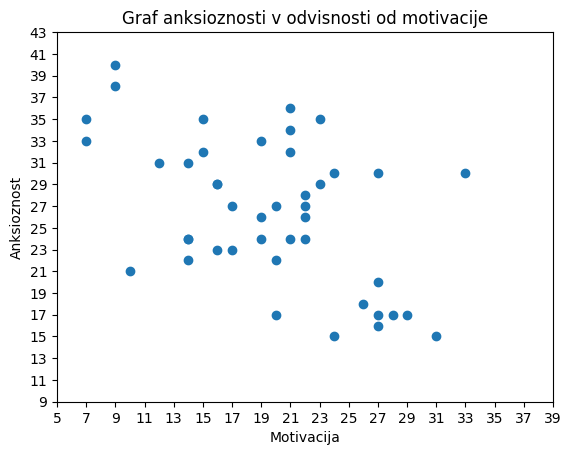

In [63]:
from matplotlib import pyplot
pyplot.scatter(df["Motivacija"], df["Anksioznost"])
pyplot.xlabel('Motivacija')
pyplot.ylabel('Anksioznost')
pyplot.title('Graf anksioznosti v odvisnosti od motivacije')


pyplot.xticks(np.arange(5, 40, 2))

pyplot.yticks(np.arange(9, 45, 2))


pyplot.show()

In [64]:
from numpy import cov
covariance = cov(df["Motivacija"], df["Anksioznost"])
print(covariance)

[[ 40.34672304 -21.55813953]
 [-21.55813953  44.1627907 ]]


In [65]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(42)

In [66]:
from scipy import stats

pearson_corr, pearson_p_value = stats.pearsonr(df["Motivacija"], df["Anksioznost"])
print("Pearson correlation coefficient: %.3f" % pearson_corr)
print("P-value: %.3f" % pearson_p_value)

# Calculate Spearman correlation coefficient and p-value
spearman_corr, spearman_p_value = stats.spearmanr(df["Motivacija"], df["Anksioznost"])
print("Spearman correlation coefficient: %.3f" % spearman_corr)
print("P-value: %.3f" % spearman_p_value)

Pearson correlation coefficient: -0.511
P-value: 0.000
Spearman correlation coefficient: -0.447
P-value: 0.002


Test linearnosti

In [67]:
import statsmodels.formula.api as smf

fit = smf.ols('Motivacija ~ Anksioznost', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Motivacija   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     14.82
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           0.000397
Time:                        10:30:28   Log-Likelihood:                -136.62
No. Observations:                  44   AIC:                             277.2
Df Residuals:                      42   BIC:                             280.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.4815      3.462      9.382      

In [68]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 0.7861357583825881),
 ('p-value', 0.3752711509269757),
 ('f-value', 0.7640534451503802),
 ('f p-value', 0.3870338533976373)]

# Test normalnosti

Shapiro-Wilk Test Results for Motivacija:
P-value: 0.7093
The data in Motivacija looks Gaussian (fail to reject H0)


Shapiro-Wilk Test Results for Anksioznost:
P-value: 0.3094
The data in Anksioznost looks Gaussian (fail to reject H0)


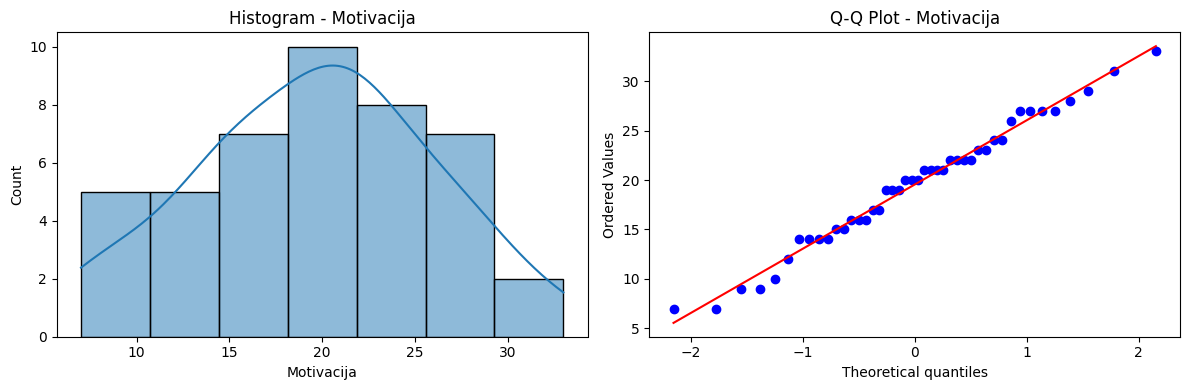

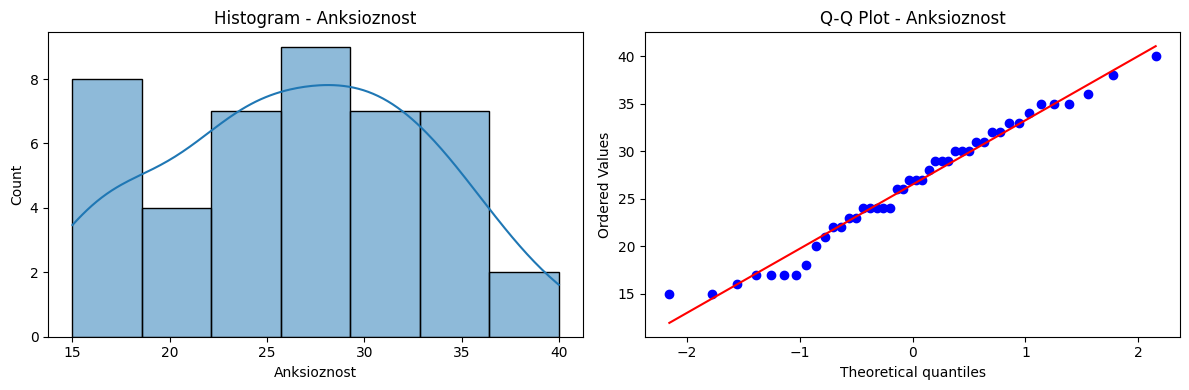

In [69]:
import numpy as np
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset (replace 'your_data.csv' with your file)
data = df

# Specify the columns to test for normality
column1 = "Motivacija"  # Replace 'column_name_1' with the actual column name
column2 = 'Anksioznost'  # Replace 'column_name_2' with the actual column name

# Perform Shapiro-Wilk test for column 1
statistic1, p_value1 = shapiro(data[column1])

# Perform Shapiro-Wilk test for column 2
statistic2, p_value2 = shapiro(data[column2])

# Display normality assessment
print(f"Shapiro-Wilk Test Results for {column1}:")
print(f"P-value: {p_value1:.4f}")
if p_value1 > 0.05:
    print(f"The data in {column1} looks Gaussian (fail to reject H0)")
else:
    print(f"The data in {column1} does not look Gaussian (reject H0)")

print("\n")

print(f"Shapiro-Wilk Test Results for {column2}:")
print(f"P-value: {p_value2:.4f}")
if p_value2 > 0.05:
    print(f"The data in {column2} looks Gaussian (fail to reject H0)")
else:
    print(f"The data in {column2} does not look Gaussian (reject H0)")

# Visual assessment of normality for column 1
plt.figure(figsize=(12, 4))

# Histogram for column 1
plt.subplot(1, 2, 1)
sns.histplot(data[column1], kde=True)
plt.title(f'Histogram - {column1}')

# Q-Q plot for column 1
plt.subplot(1, 2, 2)
probplot(data[column1], dist="norm", plot=plt)
plt.title(f'Q-Q Plot - {column1}')

plt.tight_layout()
plt.show()

# Visual assessment of normality for column 2
plt.figure(figsize=(12, 4))

# Histogram for column 2
plt.subplot(1, 2, 1)
sns.histplot(data[column2], kde=True)
plt.title(f'Histogram - {column2}')

# Q-Q plot for column 2
plt.subplot(1, 2, 2)
probplot(data[column2], dist="norm", plot=plt)
plt.title(f'Q-Q Plot - {column2}')

plt.tight_layout()
plt.show()

# SPOL

In [70]:
corr, _ = pearsonr(df["Motivacija"], df["Spol"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.215


### Cohen d, alpha, omega

In [71]:
from numpy import var
from math import sqrt
from numpy import mean
def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = mean(d1), mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

In [72]:
d = cohend(df["Motivacija"], df["Anksioznost"])
print(d)

-1.0698698440172434


In [86]:
data = df
selected_columns = ['Anksioznost', 'Motivacija']
data = data[selected_columns]

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(method='minres')

# Fit the factor analysis model to your data
fa.fit(data)

# Calculate factor loadings
loadings = fa.loadings_

# Calculate error variances (unique variances)
# Error variance = 1 - (factor loading)^2
error_variances = 1 - np.square(loadings)

# Calculate McDonald's Omega
omega = 1 - (np.sum(error_variances) / np.sum(1 + error_variances))

print("McDonald's Omega:")
print(omega)


McDonald's Omega:
0.5731833853662407


In [88]:
def calculate_omega(loadings):
    error_variances = 1 - np.square(loadings)
    omega = 1 - (np.sum(error_variances) / np.sum(1 + error_variances))
    return omega

# Number of bootstrap samples
num_samples = 1000
omega_values = []

# Bootstrap resampling and calculating Omega
for _ in range(num_samples):
    # Resampling with replacement
    bootstrap_indices = np.random.choice(df.index, size=len(df), replace=True)
    bootstrap_data = df.iloc[bootstrap_indices]

    # Fit FactorAnalyzer to bootstrap data
    fa.fit(bootstrap_data)
    loadings = fa.loadings_

    # Calculate Omega for the bootstrap sample
    omega = calculate_omega(loadings)
    omega_values.append(omega)

# Calculate 95% confidence interval
confidence_interval = np.percentile(omega_values, [2.5, 97.5])

print("McDonald's Omega:")
print(f"Point Estimate: {np.mean(omega_values)}")
print(f"95% Confidence Interval: {confidence_interval}")

McDonald's Omega:
Point Estimate: 0.5365949628756664
95% Confidence Interval: [0.53099832 0.54375355]


In [87]:
import pingouin as pg

pg.cronbach_alpha(data=data)

(0.6756671691487071, array([0.406, 0.823]))

### Tale gutman je pa za ostalo consistency za kategoricne

In [81]:
import pandas as pd
from scipy.stats import kendalltau

def gutman_lambda(df, columns):
    corr_matrix = pd.DataFrame(index=columns, columns=columns)
    
    for col1 in columns:
        for col2 in columns:
            corr, _ = kendalltau(df[col1], df[col2])
            corr_matrix.loc[col1, col2] = corr
    
    lambda_val = 1 - (1 / (len(columns) * (len(columns) - 1))) * sum([sum([corr_matrix.loc[col1, col2] for col2 in columns]) for col1 in columns])
    return lambda_val

# Example usage:
# Assuming 'df' is your pandas DataFrame and 'cols' is a list of columns containing categorical data
lambda_value = gutman_lambda(df, ["Razred", "Spol", "Profesor"])
print("Gutman's Lambda:", lambda_value)

Gutman's Lambda: 0.33451669917417504
